<a href="https://colab.research.google.com/github/lucasswolff/Machine-Learning-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This project was made by Lucas Wolff as a regression study case. The main goal is to create a model to predict the house princing in Taipei. 
The original dataset can be found in following link: https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Real%20Estate%20Valuation



The dataset has 7 columns and 414 rows. 
The columns are the following:

**X1** transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

**X2** house age (unit: year)

**X3** distance to the nearest MRT station (unit: meter)

**X4** number of convenience stores: The number of convenience stores in the living circle on foot

**X5** latitude (unit: degree)

**X5** longtitude (unit: degree)

**Y** house price of unit area (10000 New Taiwan Dollar/Ping. for example, 29.3 = 293,000 New Taiwan Dollar/Ping)

**Importing libraries and the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

#cross validation
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold

#metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate



In [ ]:
!mkdir -p '/content/drive/MyDrive/Colab Datasets/house-price-prediction-taipei' #create directory in Google Drive
!wget -P '/content/drive/MyDrive/Colab Datasets/house-price-prediction-taipei' https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Real%20Estate%20Valuation/Real%20estate%20valuation%20data%20set.xlsx

--2022-03-17 21:40:29--  https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Real%20Estate%20Valuation/Real%20estate%20valuation%20data%20set.xlsx
Resolving code.datasciencedojo.com (code.datasciencedojo.com)... 167.99.111.153
Connecting to code.datasciencedojo.com (code.datasciencedojo.com)|167.99.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30734 (30K) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/Colab Datasets/house-price-prediction-taipei/Real estate valuation data set.xlsx.4’

Real estate valuati 100%[===================>]  30.01K  --.-KB/s    in 0.07s   

2022-03-17 21:40:29 (407 KB/s) - ‘/content/drive/MyDrive/Colab Datasets/house-price-prediction-taipei/Real estate valuation data set.xlsx.4’ saved [30734/30734]



Let's take a look in the the date set

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Datasets/house-price-prediction-taipei/Real estate valuation data set.xlsx')
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


# **Exploratory data analysis**

**Checking for missing values and wrong data**

In [ ]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

As we can see, there is no missing values in the dataset



In [ ]:
df.loc[df['Y house price of unit area'] <= 0]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


A price below zero would be considered a wrong value. In this data set there is no value below zero

**Checking for outliers**

In [ ]:
#standard scaling the price
price_scaled = StandardScaler().fit_transform(df['Y house price of unit area'][:,np.newaxis])

#10 lowest values
lowest_values = price_scaled[price_scaled[:,0].argsort()][:10]

#10 highest values
highest_values= price_scaled[price_scaled[:,0].argsort()][-10:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
print('\n The lowest values is: \n')
print(lowest_values)

print('\n The highest values is: \n')
print(highest_values)


 The lowest values is: 

[[-2.2354741 ]
 [-1.97057432]
 [-1.94114101]
 [-1.89699104]
 [-1.85284108]
 [-1.85284108]
 [-1.84548275]
 [-1.83812442]
 [-1.82340777]
 [-1.80869111]]

 The highest values is: 

[[1.8631143 ]
 [1.90726426]
 [2.1868807 ]
 [2.33404725]
 [2.36348056]
 [2.42970551]
 [2.62102203]
 [2.94478843]
 [2.96686342]
 [5.85132778]]


The lowest valus are close to zero and are similar. The highest values have a greater diversion from 0. We can see that one house in particular has a much higher price than others.

Even tough there are some outliers, we won't be delete ou alter it for now, because high prices are expeceted in real estate (it could be a mansion with diamond chandeliers!). But let's keep keep this particular really expensive house and see what we can do about it later. 

In [ ]:
for x in df.index:
  if df.loc[x, "Y house price of unit area"] > 90:
    df.drop(x, inplace = True)

**Plots**

Text(0.5, 1.0, 'Box plot of number of convenience stores vs house price')

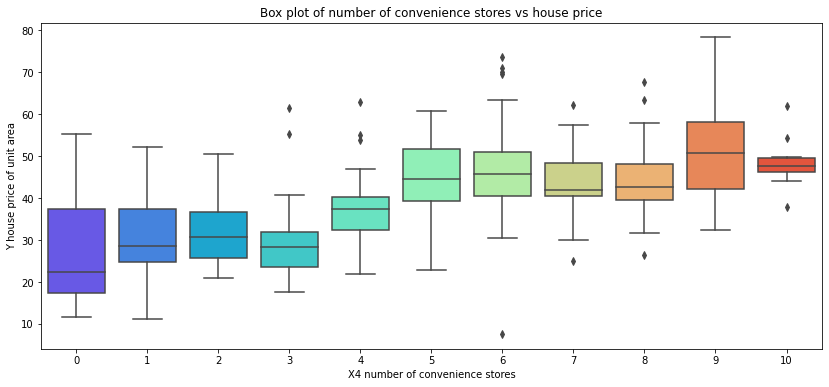

In [ ]:
f = plt.figure(figsize=(14,6))

sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area',data=df,palette='rainbow')
plt.title('Box plot of number of convenience stores vs house price')

The average price tends to be higher when the region has more convecience stores, but not necessarily a house with more stores around will be more expensive. 

Text(0.5, 1.0, 'transaction date vs house price')

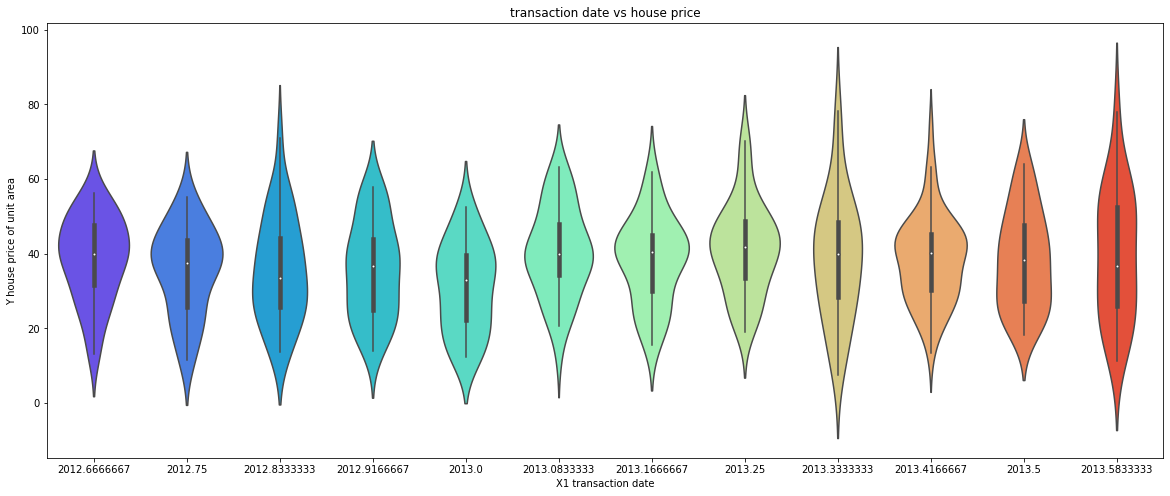

In [ ]:
f = plt.figure(figsize=(20,8))
sns.violinplot(x='X1 transaction date', y='Y house price of unit area',data=df,palette='rainbow')
plt.title('transaction date vs house price')

For the transaction date, the price average is almost the same for all dates. With a high density around the average. In the date 2013.333 is possible to see identify some outliers.

We can drop this column. The only reason we would keep it its because inflation may cause an effect. But that doesn't seem to be the case to Taiwan. The inflation was low between 2012 and 2013. 
https://www.statista.com/statistics/727598/inflation-rate-in-taiwan/ 

In [ ]:
df = df.drop(['X1 transaction date'], axis=1)
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


Text(0.5, 1.0, 'Distance to the nearest MRT station vs price')

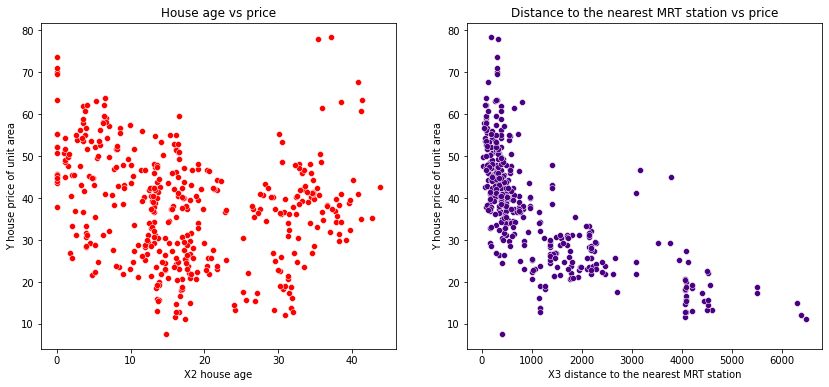

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='X2 house age',y='Y house price of unit area',data=df,ax=ax, color = 'red')
ax.set_title('House age vs price')

ax = f.add_subplot(122)
sns.scatterplot(x='X3 distance to the nearest MRT station',y='Y house price of unit area',data=df,ax=ax, color = 'indigo')
ax.set_title('Distance to the nearest MRT station vs price')

From the first plot, is possible to see that the house age doesn't affect the price as it would be expected. From the second plot, we can see that the houses with bigger prices are at least 1000 m from the MRT station, even though some houses with low price is also near a station 

# **Transforming Coordinates into Clusters**

Latitude and longitude can't be used as a numeric value in a regression algorithm. One way to use this data in a proper way is to transform it into clusters. 

Plotting the coordinates:

Text(0.5, 1.0, 'Coordinates')

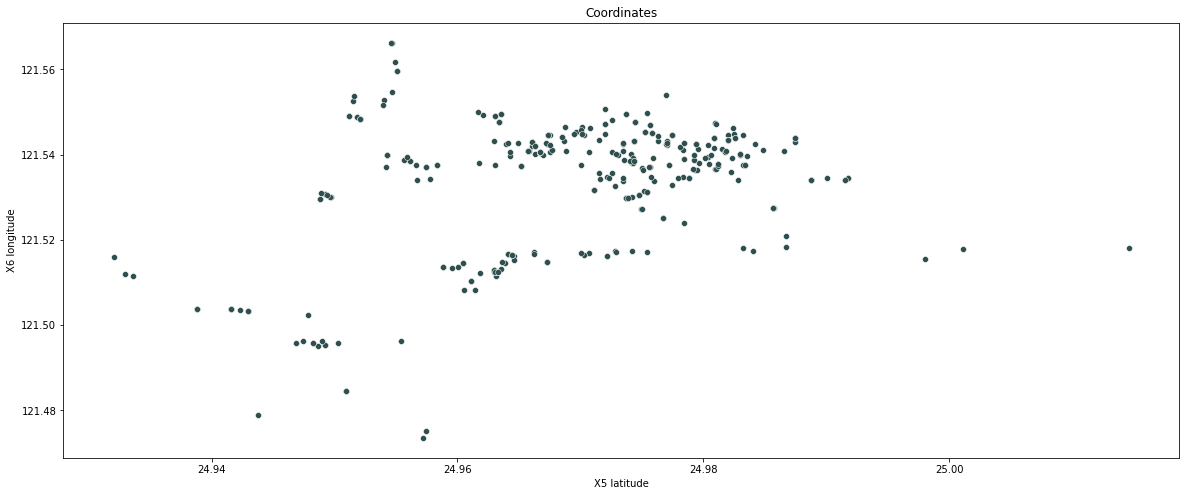

In [ ]:
f = plt.figure(figsize=(20,8))
sns.scatterplot(x='X5 latitude', y='X6 longitude'  ,data=df,color='darkslategray')
plt.title('Coordinates')

In [ ]:
df_coordinates = df.loc[:,['X5 latitude','X6 longitude']].values

Using the Elbow Method to find the best number of clusters

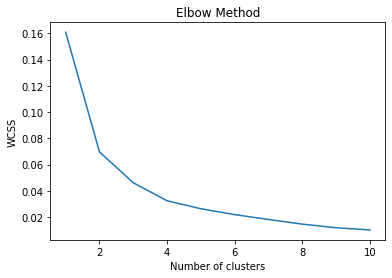

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(df_coordinates)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Number of clusters to be used: 4

Training the model

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_coordinates)

Ploting the clusters

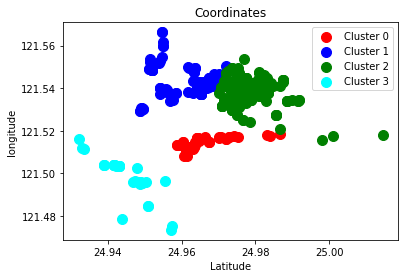

In [ ]:
plt.scatter(df_coordinates[y_kmeans == 0,0], df_coordinates[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(df_coordinates[y_kmeans == 1,0], df_coordinates[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(df_coordinates[y_kmeans == 2,0], df_coordinates[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(df_coordinates[y_kmeans == 3,0], df_coordinates[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 3')

plt.title('Coordinates')
plt.xlabel('Latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()

This clusters could be interpreted as neighborhoods. The ideal solution would be to use the coordinates to identify what is the real neigborhood in Taipei. But this kind of data was not found. 

Inserting the clusters into the dataset

In [ ]:
y_kmeans = pd.DataFrame(y_kmeans, columns = ['Location Cluster'])
df = pd.concat([y_kmeans, df], axis=1)
df = df.drop(['X5 latitude', 'X6 longitude'], axis=1)
df.dropna(inplace = True)
df.head()

,Location Cluster,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2.0,32.0,84.87882,10.0,37.9
1,2.0,19.5,306.59470,9.0,42.2
2,2.0,13.3,561.98450,5.0,47.3
3,2.0,13.3,561.98450,5.0,54.8
4,2.0,5.0,390.56840,5.0,43.1


# Preprossecing the data





The clusters created before classify as categorical data. Therefore, the date need to be transformed into dummie variables

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

#deleting the first dummy variable to avoid the Dummy Variable Trap
x = np.delete(x, 0, axis=1)

Dividing the dataset into test set and traning set won't be necessary because we are going to use cross-validation

# Predicting the price

**The first model to be tried was linear regression**

In [ ]:
kf=KFold(n_splits=10)
regressor = LinearRegression()
y_pred = cross_val_predict(regressor, x, y, cv=kf)

In [ ]:
cv_results = cross_validate(regressor, x, y, cv=kf)
cv_results['test_score']

array([0.7117074 , 0.7713063 , 0.64164409, 0.41886098, 0.80728253,
       0.65203398, 0.59086276, 0.35226663, 0.55736332, 0.60998447])

In [ ]:
mean_squared_error(y, y_pred)

63.616180689352014

In [ ]:
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y.reshape(len(y), 1)), axis = 1))

In [ ]:
r2 = r2_score(y, y_pred)
print('The R2 for the test set is %0.2f' % r2)

The R2 for the test set is 0.62


As we can see, linear regression is not a good model to predict the house pricing

**Random forest regression**

In [ ]:
regressor = regressor = RandomForestRegressor(n_estimators = 100)
y_pred = cross_val_predict(regressor, x, y, cv=kf)

In [ ]:
cv_results = cross_validate(regressor, x, y, cv=kf)
cv_results['test_score']

array([0.73751981, 0.79638005, 0.74824596, 0.6476069 , 0.82824011,
       0.64451419, 0.76751211, 0.6308121 , 0.71344125, 0.79087661])

In [ ]:
mean_squared_error(y, y_pred)

45.964107419218934

In [ ]:
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y.reshape(len(y), 1)), axis = 1))

In [ ]:
r2 = r2_score(y, y_pred)
print('The R2 for the test set is %0.2f' % r2)

The R2 for the test set is 0.73


**Support Vector Regression**

In [ ]:
#transforming y in 2D array
y = y.reshape(len(y), 1)

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x[:,4:] = sc_x.fit_transform(x[:,4:])
y = sc_y.fit_transform(y)                

In [ ]:
regressor = SVR(kernel = 'linear', C = 1)

In [ ]:
y_pred = cross_val_predict(regressor, x, y, cv=kf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
cv_results = cross_validate(regressor, x, y, cv=kf)
cv_results['test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.69354122, 0.76653047, 0.63453578, 0.41011299, 0.80789608,
       0.63238582, 0.61563349, 0.39177419, 0.53504441, 0.61457587])

In [ ]:
#bringing y and y pred to it's normal values (without feature scaling
y_pred = y_pred.reshape(len(y_pred),1)
y_pred = sc_y.inverse_transform(y_pred)

y = y.reshape(len(y),1)
y = sc_y.inverse_transform(y)

In [ ]:
mean_squared_error(y, y_pred)

63.784834829836825

In [ ]:
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y.reshape(len(y), 1)), axis = 1))

In [ ]:
r2 = r2_score(y, y_pred)
print('The R2 for the test set is %0.2f' % r2)

The R2 for the test set is 0.62


# Conclusion

Based on the MSE and R2 metrics, we can see that the model that performed the best was the random forest. But even for the random forest, the  R2 wasn't very good. Another models could be experimented, but there is also an underlying reason for this performance: the dataset don't have some variables that plays a big role in real estate. Some variables that would help in the performance of the ML algorithms are: house's size, number of rooms, number os bathrooms, weather the house has air conditioning/heating and weather house is already furnished.   